# Convolutional Neural Networks with Tensorflow 💻

Now that we have learned about the theory around convolutional neural networks, let's learn how to process images and build CNNs with Tensorflow!

## What will you learn in this course? 🧐🧐

This lesson will focus on convolutional neural networks and the various layers that are often used in model architectures using convolutional neurons. We will start by giving a general introduction then move on to a demo with code, and additional ressources that help interpret what these models are "seeing".

* Image processing with tensorflow
  * Data augmentation
    * general principle
    * Manual data augmentation
    * ImageDataGenerator
      * from directory
      * from DataFrame
* Build a convolutional neural network with tensorflow
  * Conv1D, Conv2D, Conv3D layers
  * Pooling


## Image processing with tensorflow 🌆🌆

Now that you understand the general principle of how convolution layers work it is time to get into the details of how we will load and process images to build datasets with tensorflow.

First let's see how we can load a single image and convert it to a tensor.

In [1]:
# La bonne pratique :
# aller chercher les données sur S3
# sauver sur colab
# .get_file()
# le dossier sur Colab c'est toujours ./content...



# Let's load a single image with tensorflow
import tensorflow as tf
# this command will download the file in the content directory
tf.keras.utils.get_file("/content/flower.jpg",origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/flowers-324175_1920.jpg")
# now let's open this file using tensorflow
img = tf.io.read_file("/content/flower.jpg")
img

191416/191416 [==============================] - 0s 2us/step


<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x05\x00\x07\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00\x1a\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\x

We get a tensor that contains a single `str` object, this is actually our image file represented in bytes, in order to get a numeric tensor with the values on each pixel we now need to decode this byte file according to its storage format (here it's jpeg but many other formats exist and there are special decoding functions for most of them)

In [2]:
# Tenseur 3 canaux

# Let's convert the bytes to a numeric tensor
img = tf.image.decode_jpeg(img)
img

<tf.Tensor: shape=(1280, 1920, 3), dtype=uint8, numpy=
array([[[236, 240, 251],
        [237, 241, 252],
        [238, 242, 253],
        ...,
        [177, 144, 171],
        [175, 145, 171],
        [175, 145, 171]],

       [[236, 240, 251],
        [237, 241, 252],
        [238, 242, 253],
        ...,
        [179, 146, 173],
        [177, 147, 173],
        [177, 147, 173]],

       [[237, 241, 252],
        [238, 242, 253],
        [237, 244, 252],
        ...,
        [181, 149, 173],
        [182, 149, 176],
        [182, 149, 176]],

       ...,

       [[235, 253, 253],
        [235, 253, 253],
        [235, 253, 253],
        ...,
        [195, 159, 207],
        [194, 158, 206],
        [194, 158, 206]],

       [[235, 253, 253],
        [235, 253, 253],
        [235, 253, 253],
        ...,
        [194, 158, 206],
        [194, 158, 206],
        [193, 157, 205]],

       [[235, 253, 253],
        [235, 253, 253],
        [235, 253, 253],
        ...,
        [193, 157, 

We were able to decode the content of the image, now we have a numeric tensor of type `int` with shape `(1280,1920,3)` listing the height, width and number of channels of the image. We can visualize this image (spoiler alert, you have already seen it!) but let's resize it first as it is very very big!

In [3]:
# To resize an image using tensorflow you can use the following command
img = tf.image.resize(img, (img.shape[0]//2, img.shape[1]//2))
# It will resize the image by averaging pixel values that are next to each other

In [4]:
# let's use plotly to visualize the image
from plotly import express as px
px.imshow(img)

The resize function is actually really useful because for most applications images really do not need to be in HD in order for the model to analyse them well, quite the opposite, the higher the definition of the images the more demanding the forward pass of your model will be, leading to exponentially growing computation time and memory you would need to handle the task.

To give you some perspective, even the best performing image classification models trained by institutions like Google work with images of shape `(224,224,3)` which is quite low definition. This good news because low definition images are easier to make, store and handle for computer programs and hardware.

### Data Augmentation ➕

Data augmentation is a very useful technique that makes it possible to artificially increase the amount of data you will be able to use for training and therefore lead to better prediction results.



### General principle 📜

The idea is the following: when you think of a classification task on images for example, your input data are images representing objects like dogs or cats or flowers, and the target variable indicates the category to which the image belongs to.

Imagine if you were to modify the image by flipping it horizontally or vertically, or change the contrast or brightness of the image slightly, would you still be able to recognize what category of the target the image belongs to? The answer is most certainly yes! Let's see for yourself

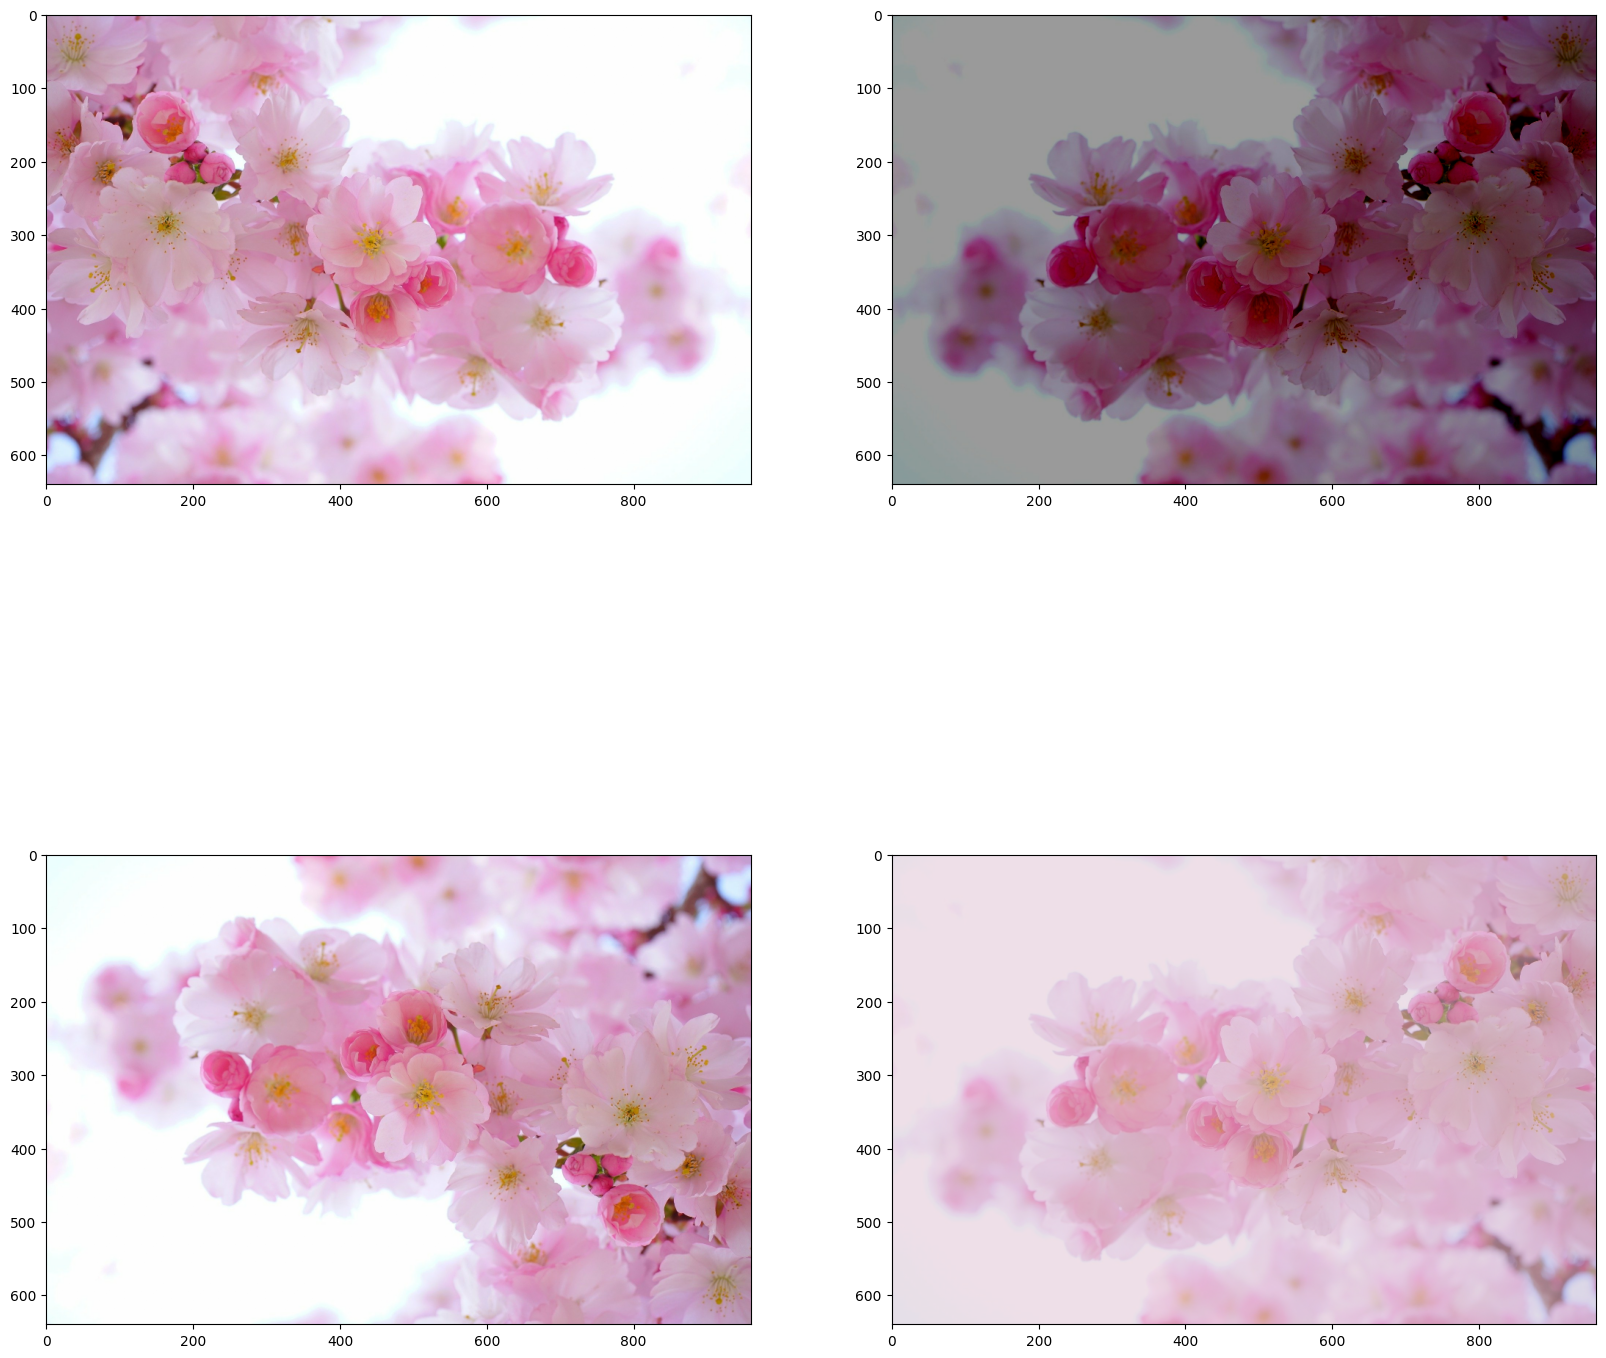

In [5]:
# Data augmentation
# On le fait jamais
# Voir image generator

img2 = tf.image.flip_left_right(img) # flips the image horizontally
img3 = tf.image.flip_up_down(img) # flips the image vertically
img4 = tf.image.adjust_brightness(img,-100) # changes brightness
img5 = tf.image.adjust_contrast(img,0.5) # changes contrast

from matplotlib import pyplot as plt

fig, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].imshow(img2/255) # we divide by 255 to represent images with floats between 0 and 1
ax[1,0].imshow(img3/255)
ax[0,1].imshow(img4/255)
ax[1,1].imshow(img5/255)

fig.show()

If you are still able to recognize the object represented in the image, in this case cherry blossom, then our data augmentation was successful. The value of the target variable is not affected by the transformations applied but if we were to compare those images with the computer, which does a pixel per pixel comparison, then they would seem very different.

This will allow our models to see many images representing the same object with different transformations and therefore teach the model to recognize images with many different characteristics.

We saw how to manually change the values in our images, now let's see how we can do that in a more automated fashion in order to build batch of images with data augmentation on demand!

### Image generator 🔋

Tensorflow makes it very easy to run data augmentation on your image datasets! For this we will create an object called a `generator` and this generator can be used to produce data on demand. Let's see how it works with code! Find the documentation <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator"> here </a>.

In [6]:
# Va créer des générateurs pour les batchs qui vont modifier les images
# C'est image par images du batch
# Quand on dit rotation_range=180 ca veut dire qu'à la génération il va pouvoir tirer un angle entre 0 et 180°
# On comment par créer un objet
# ici img_generator



from tensorflow.keras.preprocessing.image import ImageDataGenerator



img_generator = ImageDataGenerator(
    rotation_range=180,             # Angle range for random image rotation
    width_shift_range=0.1,          # Random shift of the image along width axis
    height_shift_range=0.1,         # Random shift of the image along height axis
    brightness_range=(0.5,1),       # Random brightness modification
    shear_range=0.1,                # Random distortion of the image
    zoom_range=0.1,                 # Random zoom on the image
    channel_shift_range=50.0,       # Random hue modification
    horizontal_flip=True, # Randomly flips image horizontally
    vertical_flip=True, # Randomly flips image virtically
    rescale=1/255., # Rescaling values from [0,255]->[0,1]
    fill_mode='wrap',
    validation_split=0.3 # Portion of the data that can be saved for validation
)

This class creates an object that lets you generate randomly transformed images from reference images. Note that if you set all parameters to `None` or `0` then the images produced by the generator will not be modified compared to their point of reference, so you can use this function to create non modified image datasets as well!

Now that we know how to set up the generator, let's see two techniques that let us start producing images!

#### From directory 📁

This first method lets you load images as you go directly from a folder in your storage space. The folder needs to be organized in the following way:
```
├── Folder
│   ├── Class1
│   │   ├── Image1.jpg
│   │   ├── Image2.jpg
│   │   ├── ...
│   │   └── ImageN.jpg
│   ├── Class2
│   │   ├── Image1.jpg
│   │   ├── Image2.jpg
│   │   ├── ...
│   │   └── ImageN.jpg
│   ├── ...
│   └── ClassP
│       ├── Image1.jpg
│       ├── Image2.jpg
│       ├── ...
│       └── ImageN.jpg
  ```       

Then what will happen is that when generating images, the generator will go pick the images from the different folders at random, apply the random transformations that were previously set up and associate to each generated image a value for the target variable corresponding to the name of the folder it was extracted from!

Let's see how it works in practice!

In [7]:
# 2 structure possible
# directory
# autant de sous dossier que de classes
# les images d'une même classe sont dans le  même dossier
# voir ici les dossiers cat et dogs




# Let's start by loading a dataset made available by google
# This function lets you load files from an oline origin into your storage space
# and potentially unzip it if it's a compressed file
tf.keras.utils.get_file("catsNdogs.zip",
                        "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip",
                        cache_subdir="/content",
                        extract=True)
# a cats_and_dog_filtered folder appeared in our storage space
# It contains a train and a validation folder so we will not have to make the split
# ourselves

68606236/68606236 [==============================] - 1s 0us/step


'/content/catsNdogs.zip'

We are going to usea method of the generator object that will let us create images from the folder.

In [8]:
# Voir img_generator
# On invoque .flow_from_directory()
# Après on précise ce que l'on veut qu'il fasse
# class_mode = "sparse" => voir target sous forme de vecteur, fonction de coût à utiliser => Sparse Categoriacle....
# batche_size ici 16 images
# shuffle
# voir que les dossier de train et validation sont déjà créés

# training et validation
# si jamais tout est dans le même dossier faut faire
# faut eviter le data leaking
# c'est avec ce paramètre qu'on "marque" les images
# le ratio est défini 0.3 est définit dans le générator : validation_split=0.3
# ATTENTION : faut garder un test set. C'est pas le cas des les exos

# flow_from_directory crée les générator

directory_generator = img_generator.flow_from_directory(
    directory = "/content/cats_and_dogs_filtered/train", # the folder where the class subfolders can be found
    target_size = (100,100), # The (height,width) of the produced images
    class_mode = "sparse", # Wether the target should be represented by an index or a dummy vector
    batch_size=16, # The batch size of the produced batches
    shuffle = True #Whether to shuffle after all files have been selected once
    #subset = "training"
)

directory_generator_val = img_generator.flow_from_directory(
    directory = "/content/cats_and_dogs_filtered/validation", # the folder where the class subfolders can be found
    target_size = (100,100), # The (height,width) of the produced images
    class_mode = "sparse", # Wether the target should be represented by an index or a dummy vector
    batch_size=16, # The batch size of the produced batches
    shuffle = True #Whether to shuffle after all files have been selected once
    #subset = "validation"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The method automatically idetnified all the images contained in the directory and the number of classes was infered from the number of sub-directories inside it.

Now that we were able to prepare all of this, this object `directory_generator` works exactly like a `tf.data.Dataset` and we can view the elements it produces in the same way:



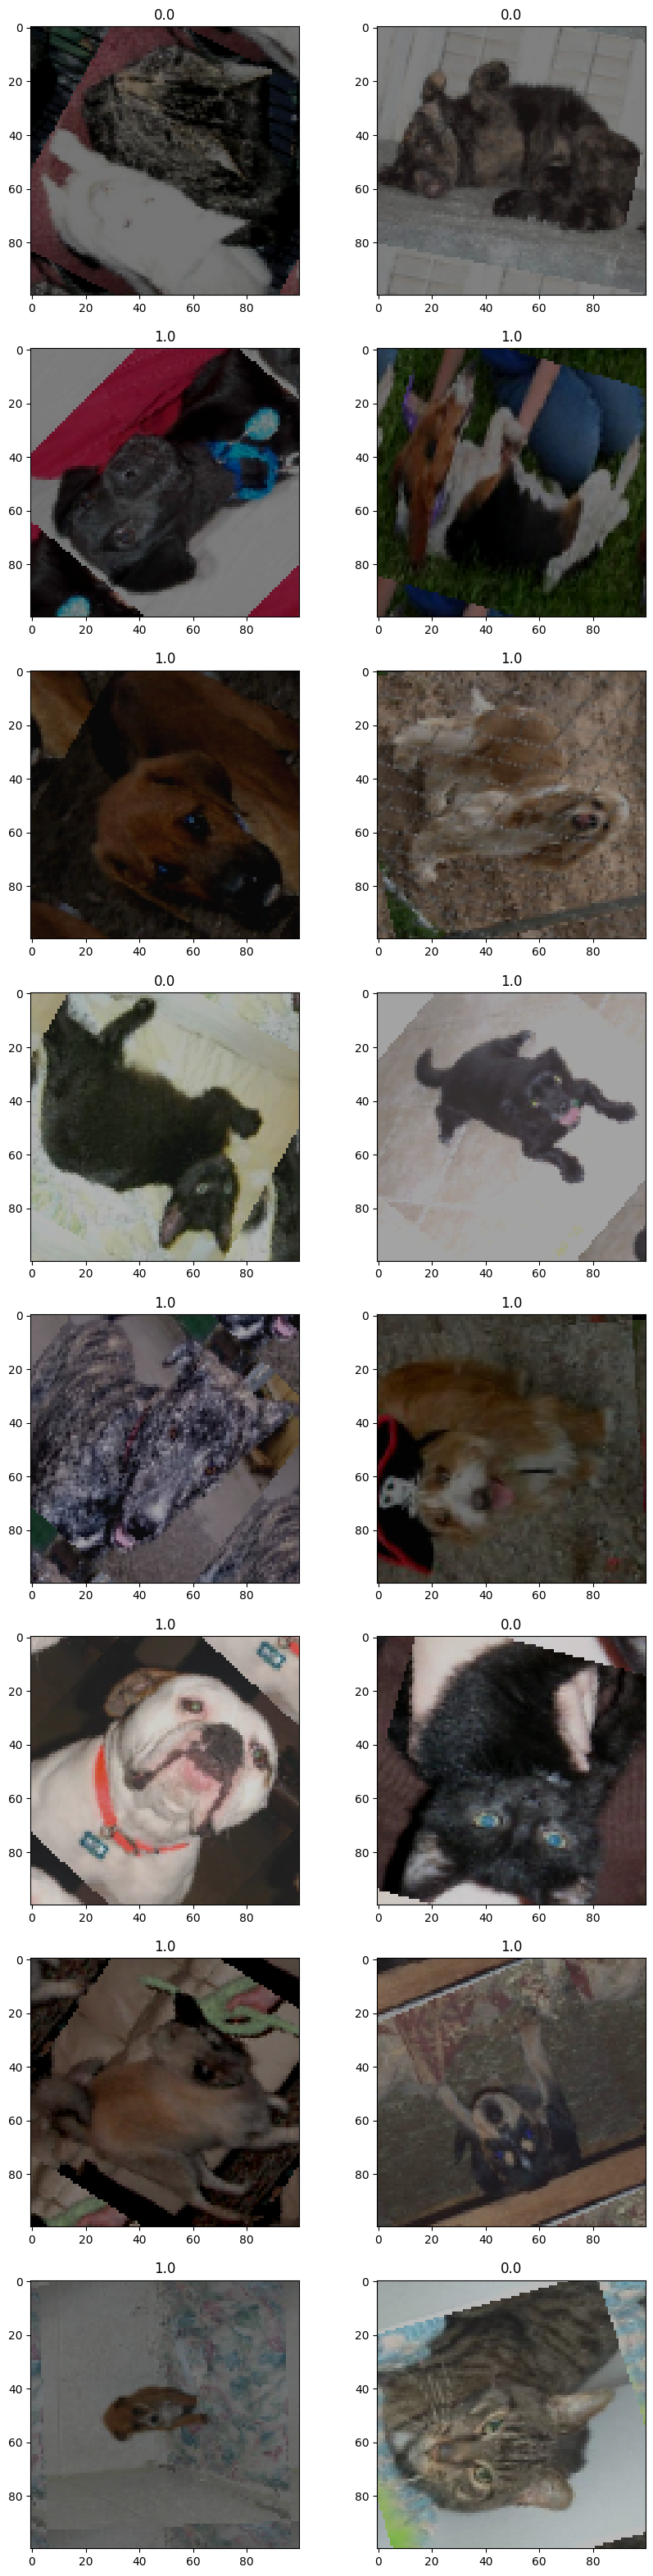

In [9]:
# next iter sort un batch de 16 images
# pour se rassurer
# on voit que cat=0 et dog=1

imgs, targets = next(iter(directory_generator))
fig, ax = plt.subplots(8,2, figsize=(10,40))
for i, (img, target) in enumerate(zip(imgs, targets)):
  ax[i-8*(i//8),i//8].imshow(img)
  ax[i-8*(i//8),i//8].title.set_text(str(target))
fig.show()

This an example of a batch of images generated with data augmentation. Which will make it possible to train the model on a virtually unlimited variety of images taken from a finite set of examples so the model will be better at generalizing its prediction to unknwown data.

#### From DataFrame 📊

This other method lets you generate images in the same way, except the images can all be stored in a single directory, the labels associated with each image in this case is stored in a DataFrame object contaning the name of each image file in one column and the value of the target in the second column. Let's find out how to work with this in practice

In [10]:
# On peut ne pas avoir une organisation
# dans train y a toutes les images
# voir repertoire train

# l'info sur le label est dans un un autre fichier


# First we download the .zip file containing all the images
tf.keras.utils.get_file("/content/cifar10.zip",
                        origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/cifar-10/train.zip",
                        extract=True,
                        cache_subdir="/content")

119728390/119728390 [==============================] - 5s 0us/step


'/content/cifar10.zip'

In [11]:
# Then the DataFrame containing the name of the image files and the value of the
# target variable
import pandas as pd
data = pd.read_csv("https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/cifar-10/trainLabels.csv")
data.head()

id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile

In [12]:
data["id"] = data["id"].astype("str") + ".png"
data.head()

id       label
0  1.png        frog
1  2.png       truck
2  3.png       truck
3  4.png        deer
4  5.png  automobile

In [13]:
# c'est là qu'on crée le générateur

df_generator = img_generator.flow_from_dataframe(
    dataframe=data,                 # the dataframe containing the filename and label column
    directory="/content/train",     # the directory containing the image files
    x_col="id",                     # the name of the column with the filenames
    y_col="label",                  # the name of the column with the labels
    target_size=(32,32),
    class_mode = "sparse",
    batch_size=16,
    shuffle = True
)

Found 50000 validated image filenames belonging to 10 classes.


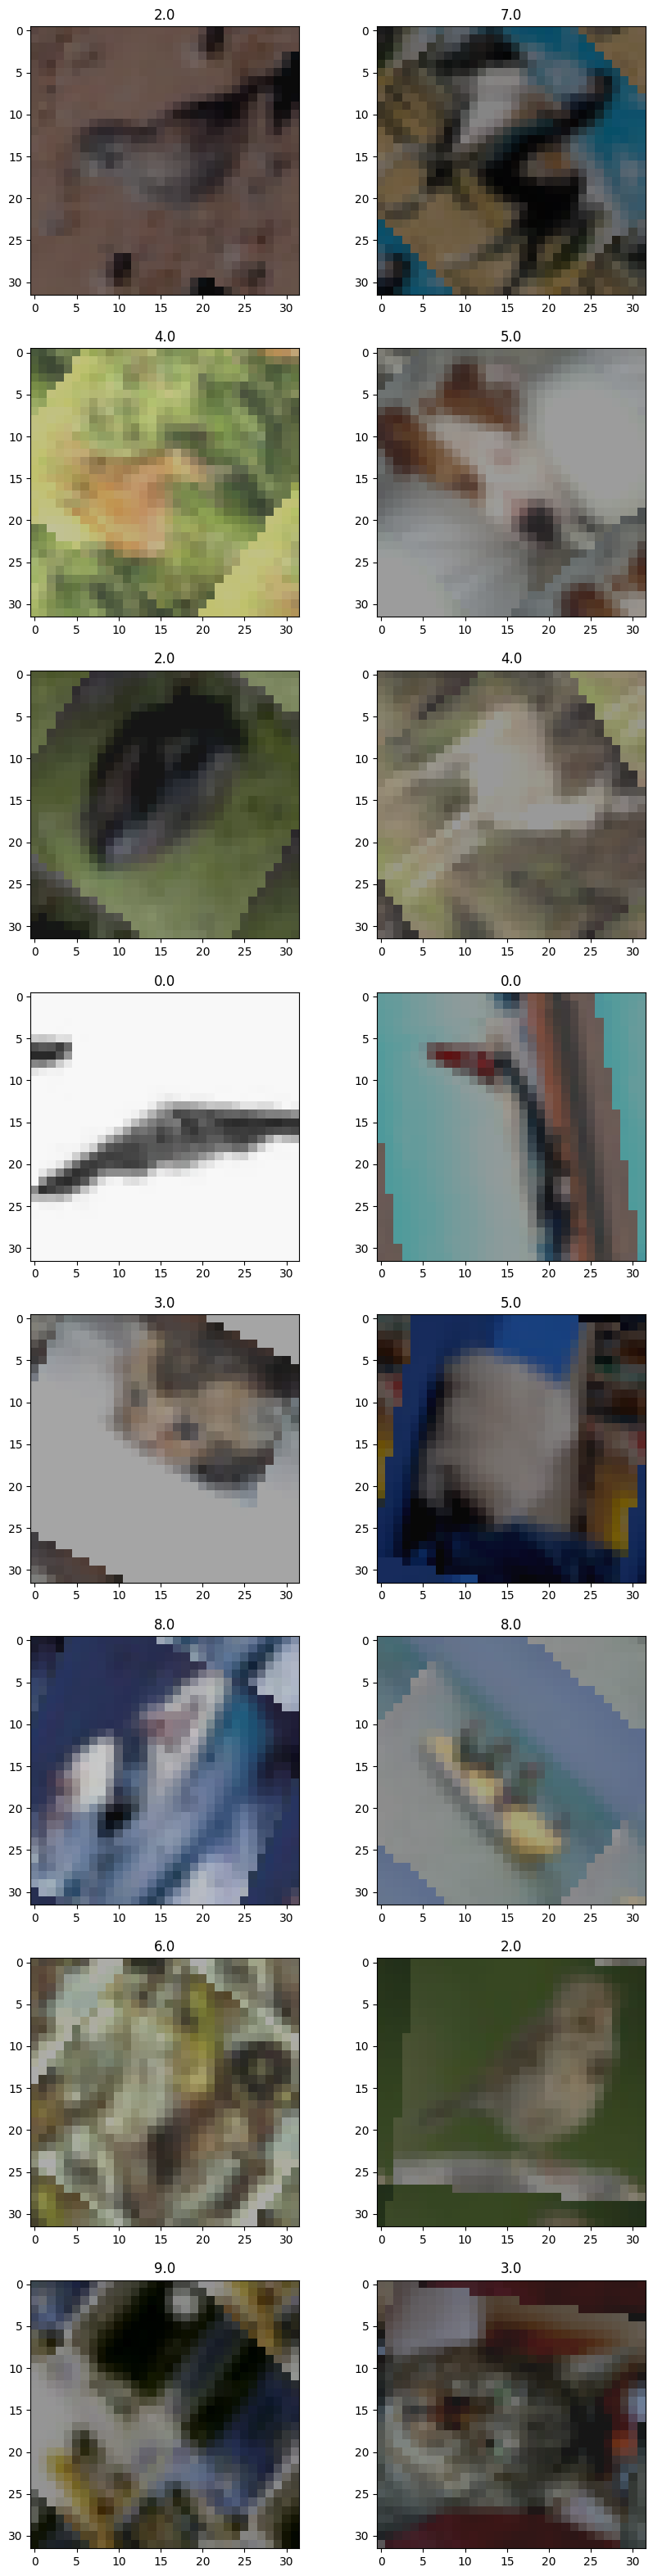

In [14]:
# iter : suffle les data et il partitionne en batch
# les modifications sont appliqués quand les images sont demandées
# très pixelisé car 32x32


imgs, targets = next(iter(df_generator))
fig, ax = plt.subplots(8,2, figsize=(10,40))
for i, (img, target) in enumerate(zip(imgs, targets)):
  ax[i-8*(i//8),i//8].imshow(img)
  ax[i-8*(i//8),i//8].title.set_text(str(target))
fig.show()

These two techniques enable you to easily produce images from either a directory organized by lables or using an external dataframe containing the values for the target variable.

## Build a convolutional neural network with tensorflow 💹💹
 Now that we know how to build image datasets, let's learn how to build convolutional neural networks with tensorflow.

### Conv1D, Conv2D, Conv3D ✖️

In order to build convolutional Neural Networks we need to learn about some new layers from `tensorflow.keras.layers`.

Before we move on to coding, one quick word about the various types of convolution. This lecture focuses mainly on bidimensional convolution because we are going to work with images which are bidemensional objects, but the convolution principle may also be applied to unidimensional like sound or time series and tridimensional objects such as 3D-images or videos (for videos the three dimensions are width length and time). The idea is the same except that the shape of the filter will be different, for 1D convolution the shape of the filter will be `(3)` for example, and for 3D convolution the shape will be `(3,3,3)` for example.

Now let's move on to code!

In [15]:
# archi des modèles
# ce matin on a vu des convolution 2D
# on peut faire en 1D ou 3D
# 1D : son, signal elec, serie tempo
# 3D : vidéo (suite d'images)

# Ici on montre juste que ca existe
# en image c'est souvent ReLU
# kernel_regularizer on peut mettre L1, L2...


from tensorflow.keras.layers import Conv1D, Conv2D, Conv3D

# let's define some convolutional layers
conv1d = Conv1D(
    filters = 16, # the number of neurons on the convolutional layer
    kernel_size = (5), # the number of elements of the input the neuron will analyse at once
    strides = 1, # how should the filters move along the conv dimension on the input
    padding = "valid", # "valid" means no padding, "same" means output shape = input shape
    activation = "relu", # the activation function
    kernel_regularizer = None # regularization on the neuron's parameters
)

conv2d = Conv2D(
    filters = 16,                 # the number of neurons on the convolutional layer
    kernel_size = (3,3),          # the size of the filter along both conv dimensions
    strides = 1,                  # how should the filters move along the conv dimensions on the input
    padding = "valid",            # "valid" means no padding, "same" means output shape = input shape
    activation = "relu",          # the activation function
    kernel_regularizer = None     # regularization on the neuron's parameters
)

conv3d = Conv3D(
    filters = 16, # the number of neurons on the convolutional layer
    kernel_size = (3,3,3), # the size of the filter along the conv dimensions
    strides = 1, # how should the filters move along the conv dimensions on the input
    padding = "valid", # "valid" means no padding, "same" means output shape = input shape
    activation = "relu", # the activation function
    kernel_regularizer = None # regularization on the neuron's parameters
)

Let's make an example of a simple convolutional neural network that we will train on the cats and dogs dataset!

In [16]:
# On créé le l'archi séquentielle
# pas dense mais 2D
# Ici on augment le nb de filter avec l'idx de la couche pour aller chercher des pattern + larges
# Input shape que pour la permeire couche
# imgs.shape[0] = taille

# On part d'image 100x100 RGB
# Conv 2D 32 3x3 2 same => sortie 32 matrices de 50x50  Param = 32 ( 3*3*3 + 1) = 896  (1er 3 car 3 kernels par filtre)
# Conv 2D 64 3x3 2 same => sortie 64 matrices de 25x25  Param = 64 (32*3*3 + 1) = ???
# Conv 2D 64 3x3 2 same => sortie 64 matrices de 13x13
# Conv 2D 128 3x3 2 same => sortie 128 matrices de 7x7

# Penser à faire summary


# A la fin on veut faire une classification binaire => dernière couche Dense, 1 neurone, sigmoide
# La dernière couche veut un vecteur, pas un un tenseur => Flatten
# vecteur de len 7x7x128

imgs, targets = next(iter(directory_generator))

modelconv = tf.keras.Sequential(
    [
     Conv2D(
         filters = 32,
         kernel_size = (3,3),
         strides = 2,
         padding = "same",
         activation = "relu",
         input_shape = (imgs.shape[1], imgs.shape[2], imgs.shape[3]) # the input shape (height, width, channels)
     ),
     Conv2D(
         filters = 64,
         kernel_size = (3,3),
         strides = 2,
         padding = "same",
         activation = "relu"
     ),
     Conv2D(
         filters = 64,
         kernel_size = (3,3),
         strides = 2,
         padding = "same",
         activation = "relu"
     ),
     Conv2D(
         filters = 128,
         kernel_size = (3,3),
         strides = 2,
         padding = "same",
         activation = "relu"
     ),
     tf.keras.layers.Flatten(), # this layer turns multi-dimensional images into flat objects
     tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

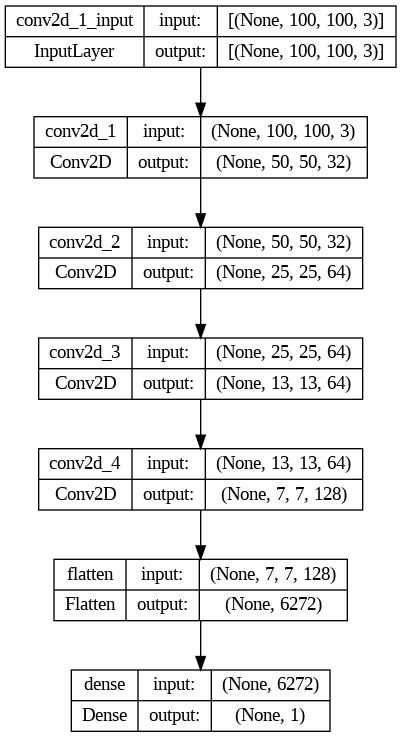

In [17]:
tf.keras.utils.plot_model(modelconv, show_shapes=True)

Herewe set the stride to 2 on purpose so that the inputs of each layer gets transformed into an output twice as small.

In [18]:
# le nb de paramètres provient des couches d'après
#
modelconv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 1)                 6273      
                                                                 
Total params: 136449 (533.00 KB)
Trainable params: 13644

Now that the model is defined we need to compile it and start training.

In [27]:
# faut compiler en passant
# optimizer
# la loss
# les metrics à suivre

# on invoque fit pour entrainer le modèle

from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.optimizers import Adam

modelconv.compile(optimizer=Adam(),
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

modelconv.fit(directory_generator, epochs = 100, validation_data=directory_generator_val)

Epoch 1/100
125/125 [==============================] - 19s 143ms/step - loss: 0.5857 - binary_accuracy: 0.6910 - val_loss: 0.6116 - val_binary_accuracy: 0.6660
Epoch 2/100
125/125 [==============================] - 18s 141ms/step - loss: 0.5968 - binary_accuracy: 0.6820 - val_loss: 0.6243 - val_binary_accuracy: 0.6290
Epoch 3/100
125/125 [==============================] - 18s 141ms/step - loss: 0.6013 - binary_accuracy: 0.6780 - val_loss: 0.6136 - val_binary_accuracy: 0.6770
Epoch 4/100
125/125 [==============================] - 16s 129ms/step - loss: 0.5810 - binary_accuracy: 0.6890 - val_loss: 0.6001 - val_binary_accuracy: 0.6710
Epoch 5/100
125/125 [==============================] - 20s 165ms/step - loss: 0.5903 - binary_accuracy: 0.6710 - val_loss: 0.6026 - val_binary_accuracy: 0.6620
Epoch 6/100
125/125 [==============================] - 21s 168ms/step - loss: 0.5706 - binary_accuracy: 0.6880 - val_loss: 0.6080 - val_binary_accuracy: 0.6710
Epoch 7/100
125/125 [===================

In [20]:
modelconv.save("/content/modelconvCNNlecture.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [21]:
# tf.keras.utils.get_file("/content/modelconvCNNlecture.h5", origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/CNN_models/modelconvCNNlecture.h5")

'/content/modelconvCNNlecture.h5'

In [22]:
modelconv = tf.keras.models.load_model("/content/modelconvCNNlecture.h5")

In [28]:
from plotly import graph_objects as go

history = modelconv.history
fig = go.Figure(data=[
  go.Scatter(
    y = history.history["loss"],
    name="Training loss",
    mode="lines",
  ),
  go.Scatter(
    y=history.history["val_loss"],
    name="Validation loss",
    mode="lines",
  )
])

fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'
)
fig.show()

This graph shows the evolution of the loss during 100 epochs of training. The fact that the loss is very unstable comes from the fact that we generate new images at each new epoch thanks to the generator so it is hard for the model to train because of all the variations we include in the images it's training from. But that is actually a good thing because it also prevents it from over fitting and forces it to recognize images from lots of different angles and shapes!

### Pooling 🏊

Let's define a new network using some pooling. Pooling layers are very often included in convolutional neural network achitectures because they make it possible to summarize information extracted by convolutional layers without having a stride higher than 1, which lets convolutional layers gather information from more positions in the input image!

In [6]:
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D

modelconvpool = tf.keras.Sequential([
     Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = "same",
            activation = "relu", input_shape = (imgs.shape[1], imgs.shape[2], imgs.shape[3])), # the input shape (height, width, channels)
     MaxPool2D(pool_size=2, # the size of the pooling window
               strides=2), # the movement of the pooling on the input
     Conv2D(filters = 64, kernel_size = (3,3), strides = 1, padding = "same",
            activation = "relu"),
     MaxPool2D(2,2),
     Conv2D(filters = 64, kernel_size = (3,3), strides = 1, padding = "same",
            activation = "relu"),
     MaxPool2D(2,2),
     Conv2D(filters = 128, kernel_size = (3,3), strides = 1, padding = "same",
            activation = "relu"),
     MaxPool2D(2,2),
     tf.keras.layers.Flatten(), # this layer turns multi-dimensional images into flat objects
     tf.keras.layers.Dense(1, activation="sigmoid")
])

NameError: name 'tf' is not defined

In [30]:
modelconvpool.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)       

In [1]:
modelconvpool.compile(optimizer=Adam(),
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

modelconvpool.fit(directory_generator, epochs = 100, validation_data=directory_generator_val)

NameError: name 'modelconvpool' is not defined

In [ ]:
modelconvpool.save("/content/modelconvpoolCNNlecture.h5")

In [ ]:
# tf.keras.utils.get_file("/content/modelconvpoolCNNlecture.h5", origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/CNN_models/modelconvpoolCNNlecture.h5")

In [ ]:
# modelconvpool = tf.keras.models.load_model("/content/modelconvpoolCNNlecture.h5")

In [ ]:
# On converge 2 fois plus vite
# moins de 40 epoques vs 80 avant

from plotly import graph_objects as go

history = modelconvpool.history
fig = go.Figure(data=[
        go.Scatter(
          y = history.history["loss"],
          name = "Training loss",
          mode = "lines",
        ),
        go.Scatter(
          y = history.history["val_loss"],
          name = "Validation loss",
          mode = "lines",
        )
      ])

fig.update_layout(
  title='Training and val loss across epochs',
  xaxis_title='epochs',
  yaxis_title='Cross Entropy'
)

fig.show()

Here we notice something very interesting, the model starts overfitting around epoch 40, which we did not observe with the other model, however after only 40 epochs it reached the same loss value on the train set and validation set that the model without pooling reached after one hundred epochs. This means that the model with pooling actually trains better than the other one!